# EO4GEO Change Detection using EO Data

<div style="text-align: justify"> Change detection is the “process of identifying differences in the state of an object or phenomenon by observing it in different times” [Singh, 1989] ; “the objective of change detection is to compare spatial representation of two points in time by controlling all variances caused by differences in the variables of interest” [Green et all., 1994] 
When using Earth Observation (EO) data, change detection algorithms analyze multiple images of the same scene – taken at different times – to identify regions of change.<br> 
A good change detection research should provide the following information : 
    <ol><li>area change and change rate;</li>
        <li>spatial distribution of changed types; </li>
        <li>change trajectories of land-cover types and </li>
        <li>accuracy assessment of change detection results.</li></ol> </div>

<h2><center>How EO Can Help to Detect Changes</center></h2>

<div style="text-align: justify">Eart Observation is done using terrestrial, aerial and satellite borne instruments: <br>
<table><tr><td><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/satplatf.png" width ="400"/></td><td><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/aerplatf.png" width ="400"/></td></tr></table> <br>
Systems on ground i.e land or water moving vehicles such as Sonar systems on ships can be used to create images of the ocean floor without needing to travel to the bottom of the ocean. Camera on satellites can be used to generate images of temperature changes in the oceans (see image below). <br>
Instruments on satellites and airplanes take images of large areas on the Earth's surface, allowing us to see much more than we can when standing on the ground. <br></div>

<div style="text-align: justify">The ground, aerial and satellite born instruments apply remote sensing principles described in the figure below. <br></div>

<div style="text-align: center"><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/rsprinc.png" width ="400"/></div>

<div style="text-align: justify">When doing change detection we use remote sensing data because
remote sensing allows acquiring information about the Earth's surface without actually being in contact with it and this is done by sensing and recording reflected or emitted energy [Canada Centre for Remote Sensing, 2007].<br>The data we get when observing the Eart by means of remote sensing is used to generate pixels - a picture element or data point in an image whose color depend on reflected or emitted energy at a given location. Pixels are characterised by the following types of resolution:</div>
<ul>
    <li>Spatial resolution: the size of an image’s pixels, usually as measured by one side of the pixel (e.g., 10m, or 1km resolution). Equivalently, the number of pixels per unit area. Higher resolution (i.e. smaller pixels) images provide more detail by capturing fine scale variation in reflectance across a given area;</li>
    <div style="text-align: center"><br><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/resspat.png" width ="400"/><br></div>
    <li>Spectral resolution: The number of bands of radiation in the electromagnetic spectrum that a satellite can sample (visible, infrared, ultraviolet, microwave, x-ray, etc.);</li>
    <div style="text-align: center"><br><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/resspec.png" width ="400"/><br></div>
    <li>Radiometric resolution: Essentially,  refers to color depth, or how detailed the colors we can create when making color composite images; The finer the radiometric resolution of a sensor, the more sensitive it is to detecting small differences in reflected or emitted energy; remote sensing data can be 8 bit, 16 bit etc;</li>
    <div style="text-align: center"><br><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/resradi.png" width ="400"/><br></div>
    <li>Temporal resolution: The amount of time of the revisiting period depends on the orbital characteristics of the sensor platform; Orbit selection can vary in terms of altitude (their height above the Earths surface), their orientation and rotation relative to the Earth; Temporal resolution varies by satellite and describes the time it takes for an individual satellite to orbit and revisit a specific area. Some satellites operates as a constellation with multiple satellites working together to increase their global coverage daily (Miglarese, 2018)</li>
    <div style="text-align: center"><br><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/restemp.png" width ="400"/><br></div>
    <li>Band: a single variable recorded at pixels in an image; Images may contain many bands as they are storing values from different parts of the electromagnetic spectrum, depending on the spectral resolution.<br></li>
</ul>

<div style="text-align: justify">Another important aspect when doing change detection using remote sensing Earth observation data is the type of instrument used to observe, which can be an active or a passive one:
<div style="text-align: center"><br><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/activpasiv.png" width ="300"/><br></div>
Passive instruments can measure energy that is naturally available. The sun's energy is either reflected, as it is for visible wavelengths, or absorbed and then re-emitted, as it is for thermal infrared wavelengths; due to these wavelengts, in general, passive satellites are not able to work during the night or through the clouds. Examples of passive satellite Earth Observation missions are: MODIS, Landsat-8, Worldview-4, Pleiades, Sentinel-2. <br>
Active instruments provide their own energy source for the 'illumination' of the target. The instrumet emits radiation which is directed toward the target to be investigated. The radiation reflected from that target is detected and measured by the sensor. Advantages for active instruments include the ability to obtain measurements anytime, regardless of the time of day or season. Examples of active satellite Earth Observation missions are: Sentinel–1, RADARSAT-2, TanDEM–X, ALOS-2.</div>

## Change Detection Methods

<div style="text-align: justify">For efectively detecting changes over a specific territory using EO satellite data, many approaches are known and presented in scientific publications [Asokan, A., Anitha, A., 2019, Change detection techniques for remote sensing applications : a survey, Earth Science Informatics, 12, 143 - 160] - see the figure below. Each of these methods involve specific processing of the EO data used for detecting chages.</div>
<br><table><tr><td><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/cdmethods.png" width="300" height="100"/></td><td><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/cdimgproc.png" width="300" height="100"/></td></tr></table> <br></div>

## Example 1: Quantity of Changes

<div style="text-align: justify">The Corine programme was initiated in the European Union in 1985. It means coordination of information on the environment.The Corine land cover (CLC) databases is coordinated by EEA. It is an inventory of land cover in 44 classes, presented as a cartographic product at a scale 1 : 100000 and a minimum mapping unit of 25 hectares. It was produced the first time for the reference year 1990, followed by updates for the years 2000, 2006, 2012, 2018. The main data source for CORINE Land Cover have been satellite images such as Landsat TM, SPOT HRV and IRS LISS. All CLC data can be accessed by download or directly as OGC services (check https://land.copernicus.eu/pan-european/corine-land-cover). The CLC data from 1990 till 2018 can be compared in the map viewer below.</div>

In [43]:
from ipyleaflet import Map, WMSLayer, GeoJSON, basemaps, LayersControl
import os, json, random, requests
if not os.path.exists('constanta.geojson'):
    url = 'https://eo4geo.sbg.ac.at/ROSA/chdet/data/constanta.geo.json'
    r = requests.get(url)
    with open('constanta.geojson', 'w') as f:
        f.write(r.content.decode("utf-8"))
with open('constanta.geojson', 'r') as f:
    data = json.load(f) 
limct = GeoJSON(data=data, name="Constanta",style = {'color': 'Blue', 'opacity':1, 'weight':1.9, 'dashArray':'5', 'fillOpacity':0.5})    

clc90 = WMSLayer(
    url='https://image.discomap.eea.europa.eu/arcgis/services/Corine/CLC1990_WM/MapServer/WmsServer?',
    layers='Corine_Land_Cover_1990_raster17001',format='image/png',transparent=True,attribution='CLC 1990',name="CLC 1990")
clc00 = WMSLayer(
    url='https://image.discomap.eea.europa.eu/arcgis/services/Corine/CLC2000_WM/MapServer/WmsServer?',
    layers='Corine_Land_Cover_2000_raster11306',format='image/png',transparent=True,attribution='CLC 2000',name="CLC 2000")
clc06 = WMSLayer(
    url='https://image.discomap.eea.europa.eu/arcgis/services/Corine/CLC2006_WM/MapServer/WmsServer?',
    layers='Corine_Land_Cover_2006_raster43084',format='image/png',transparent=True,attribution='CLC 2006',name="CLC 2006")
clc12 = WMSLayer(
    url='https://image.discomap.eea.europa.eu/arcgis/services/Corine/CLC2012_WM/MapServer/WmsServer?',
    layers='Corine_Land_Cover_2012_raster59601',format='image/png',transparent=True,attribution='CLC 2012',name="CLC 2012")
clc18 = WMSLayer(
    url='https://image.discomap.eea.europa.eu/arcgis/services/Corine/CLC2018_WM/MapServer/WmsServer?',
    layers='12',format='image/png',transparent=True,attribution='CLC 2018',name="CLC 2018")

m = Map(basemap=basemaps.CartoDB.Positron, center=(44.20, 28.60), zoom=10)
m.add_layer(clc90)
m.add_layer(clc00)
m.add_layer(clc06)
m.add_layer(clc12)
m.add_layer(clc18)
m.add_layer(limct)
lrcontrol = LayersControl(position='topright')
m.add_control(lrcontrol)
m

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

<div style="text-align: center">CLC Legend<br><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/clclegend.png" width ="500"/><br></div>

<div style="text-align: justify">In this example, the urban area of Constanta, Romania is selected (see the blue area in the map above). If statistics are computed for this specific area of interest, quantitative information about the volume of changes can be derived. Such statistics computed for the selectd urban area are given below, in comparative graphs.</div><br>
<table><tr><td>2000</td><td>2006</td><td>2012</td><td>2018</td></tr><tr>
<td><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/clcct00.png" width ="300"/></td><td><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/clcct06.png" width ="300"/></td><td><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/clcct12.png" width ="300"/></td><td><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/clcct18.png" width ="300"/></td></tr></table>

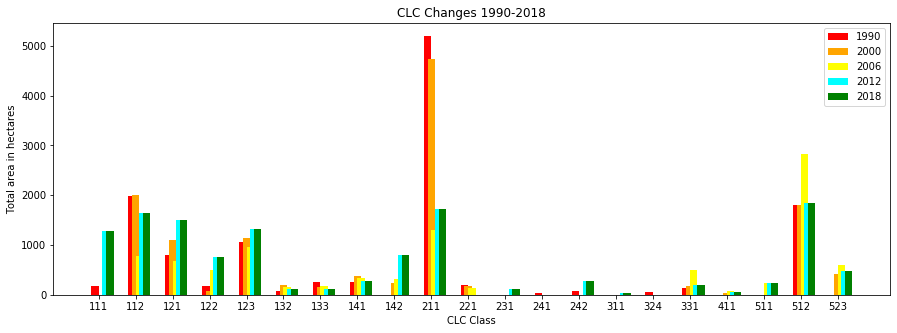

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
clcdata = pd.read_csv('https://eo4geo.sbg.ac.at/ROSA/chdet/data//clccompct.csv',dtype="str,f8,f8,f8,f8,f8")
classes = clcdata['Class'].tolist()
years=clcdata.columns
colorss=['red','orange','yellow','cyan','green']

index=np.arange(21)
wd=0.2
i=0
plt.figure(figsize=(15,5))
for y in years[1:6]:
    plt.bar(index+i*wd/2, clcdata[y].tolist(), wd, color=colorss[i], label=y)
    i=i+1

plt.xticks(index+wd/2,classes)
plt.title("CLC Changes 1990-2018")
plt.xlabel('CLC Class')
plt.ylabel('Total area in hectares')
plt.legend(loc='best')
plt.show()

## Example 2: Change Detection in Urban Area Using SAR Data

<div style="text-align: justify">Change detection process in SAR images usually has two phases : difference detection from images using several types of operations and classification of images with or without changes based on supervised or unsupervised techniques (Jia et al., 2018). <br>
The determination of changes is usually based on a ratio or difference operator, which is sensitive to radiometric and calibration errors. Speckle noise in SAR images may affect the performance. Minimization of the effect of speckle noise can be performed based on a log ratio operator (Das et al. 2016).<br>
Based on the implementation available in the the ESA SNAP Software, SAR data can be used to detect changes in urban area by applying the concept and the processing chain described in the figure below</div><br><br>
<table><tr><td><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/sarchain.png" width ="400"/></td><td><img src="https://eo4geo.sbg.ac.at/ROSA/chdet/images/sarmethod.png" width ="400"/></td></tr></table>

<div style="text-align: justify">If two satellite images are compared as shown in the viewer below, one may observe local changes due to different human activities or other reasons.</div>

In [46]:
from ipyleaflet import Map, ImageOverlay, basemaps, SplitMapControl, LayersControl
if not os.path.exists('bucuresti.geojson'):
    url = 'https://eo4geo.sbg.ac.at/ROSA/chdet/data/bucuresti.geojson'
    r = requests.get(url)
    with open('bucuresti.geojson', 'w') as f:
        f.write(r.content.decode("utf-8"))
with open('bucuresti.geojson', 'r') as f:
    data = json.load(f)   
limbuc = GeoJSON(data=data, name="Limit",style = {'color': 'Green', 'opacity':1, 'weight':1.9, 'dashArray':'5', 'fillOpacity':0.4})
bucl16 = ImageOverlay(
    url="https://eo4geo.sbg.ac.at/ROSA/chdet/images/buc16.png",
     name="Data2016",
    bounds=((44.5312, 25.9151), (44.3470, 26.2966)))
bucl19 = ImageOverlay(
    url="https://eo4geo.sbg.ac.at/ROSA/chdet/images/buc19.png",
     name="Data2019",
    bounds=((44.5312, 25.9151), (44.3470, 26.2966)))
buccd = ImageOverlay(
    url="https://eo4geo.sbg.ac.at/ROSA/chdet/images/buccd.png",
    name="Changes",
    bounds=((44.5312, 25.9151), (44.3470, 26.2966)))
bucci = ImageOverlay(
    url="https://eo4geo.sbg.ac.at/ROSA/chdet/images/sarcdmap.png",
    name="Change Info",
    bounds=((44.564453, 25.903391), (44.320411, 26.286542)))
#splitcontrol = SplitMapControl(left_layer=bucl19, right_layer=bucl16)
m = Map(basemap=basemaps.CartoDB.Positron, center=(44.45, 26.1), zoom=11)
#m.add_control(splitcontrol)
m.add_layer(bucl16)
m.add_layer(bucl19)
m.add_layer(buccd)
m.add_layer(bucci)
m.add_layer(limbuc)
lrcontrol = LayersControl(position='topright')
m.add_control(lrcontrol)
m

Map(center=[44.45, 26.1], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…

<div style="text-align: justify">In the viewer above, it can be easily seen that if two dates images are visually compared - Copernicus Sentine-1 data from 2016 and 2019 in this case - one can have difficulties in 'seing' the changes. In the change detection map derived by applying the change detection algorithms available in the ESA SNAP Software (see the layer named 'Changes') , a number of spots can be then easily identified and, using ancillary data such as Google Earth or inspection on the field, the nature of changes can be then described and further analyzed (see the layer named 'Change Info')</div> 

## Example 3: Change Detection in Image Time Series

<div style="text-align: justify">In many cases there is a need to detect phenomena with a higher change rate such as development of vegetation. In these cases, image time series (ITS) are more suitable to detect changes. <br>
It is worth mentioning that in many cases, different types of derived image indexes are used instead of raw pixel values when analyzing ITS. Here's some examples:<br><br><div style="text-align: center">
    $NDVI=\frac{NIR - Red}{NIR + Red}$ <br><br>
    $NDWI=\frac{NIR - SWIR}{NIR + SWIR}$ <br><br>
    $NDSI=\frac{Green - SWIR}{Green + SWIR}$ <br><br>
</div>where NIR - Near InfraRed, SWIR - Short-Wave InfraRed and together with Red and Green are denoting band of multispectral satellite EO data. <br> 
Normalized Difference Vegetation Index (NDVI) quantifies vegetation by measuring the difference between near-infrared (which vegetation strongly reflects) and red light (which vegetation absorbs). <br> NDSI was designed to detect snow and ice cover. NDSI is a measure of the relative magnitude of the reflectance difference between visible (green) and shortwave infrared (SWIR). It controls variance of two bands (one in the near infrared or short-wave infrared and another one in the visible parts of the spectrum). <br>
NDWI serves to detect the amount of water in soil or canopy. The NDWI varies from -1 to +1, depending on the hardwood content, as well as the type of vegetation and cover. The high NDWI values correspond to high plant water content and coating of high plant fraction. Low NDWI values correspond to low vegetation content and cover with low vegetation. During periods of water stress the NDWI rate will decrease. NDWI for agricultural monitoring of drought and irrigation management can be constructed using Copernicus Sentinel-2 data in either bands 8A and 11 or bands 8A and 12. Examples of NDVI time series (values and graphic) are given below for a number of land cover types - sand, lake, river, wetland, forest, agricultural field - as derived from Copernicus Sentinel 2 data. </div>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
ndvidata = pd.read_csv('https://eo4geo.sbg.ac.at/ROSA/chdet/data/ndvits.csv',dtype="str,f8,f8,f8,f8,f8,f8")
ndvidata

,class,mar,apr,jun,jul,sep,nov
0,sand,0.521987,0.362274,0.629853,0.610866,0.575695,0.362679
1,lake,-0.339426,-0.239437,-0.136255,0.113605,0.115603,-0.140039
2,wetland,0.147948,0.159081,0.520646,0.695311,0.514114,0.271919
3,forest,0.215534,0.230122,0.652874,0.669243,0.669421,0.286313
4,agri1,0.354588,0.230252,0.126856,0.204435,0.114027,0.373297
5,river,-0.448598,-0.303541,-0.120869,-0.311021,-0.345640,-0.410774
6,agri2,0.163498,0.171634,0.203557,0.378818,0.185632,0.075472


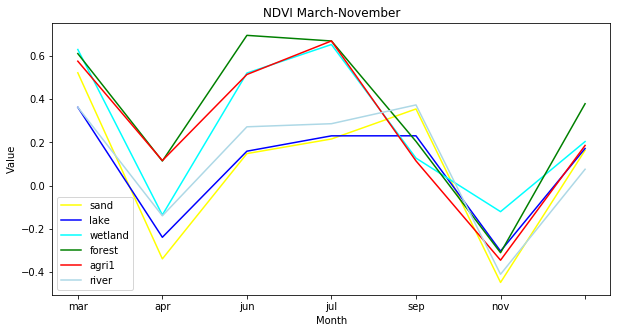

In [48]:
classes = ndvidata['class'].tolist()
months=ndvidata.columns
colorss=['yellow','blue','cyan','green','red','lightblue','orange',]
index=np.arange(7)
#wd=0.2
i=0
plt.figure(figsize=(10,5))
for y in months[1:7]:
    #plt.plot(index+i*wd, ndvidata[y].tolist(), wd, color=colorss[i], label=classes[i])
    plt.plot(index, ndvidata[y].tolist(), color=colorss[i], label=classes[i])
    i=i+1

#plt.xticks(index+wd/2,months)
plt.xticks(index,months[1:7])
plt.title("NDVI March-November")
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(loc='best')
plt.show()

<div style="text-align: justify">Using such profiles or time series one can judge based on its own or well-known scientific results and draw conclusions on the changes occured over specific areas represented by individual or groups of pixels.</div>

## Conclusions

<div style="text-align: justify">Change detection is the process of identifying differences in the state of objects or phenomena by observing them at different moments in time. Essentially, it involves the ability to quantify temporal effects using multitemporal data sets. Change detection is one of the major applications of remotely-sensed data obtained from Earth-orbiting satellites because of repetitive coverage at short time intervals and consistent image quality (Ingram et al. 1981, Nelson 1983, Singh 1984).

The first part presents details on platforms and instruments of Earth observation pursuing with the principles of remote sensing functioning. A specific importance is given to the types of resolutions which bring consistent contribution in different analysis domains.

There are several change detection approaches presented in this course, by having the example of the quantity of changes, advanced by using the forth CLC databases.

Another method employed in this course in related to qualitative data, as a result of categorizing or describing attributes of an area. The change detection map was derived from Sentinel 1 data.

Change detection in image time series is a multi-temporal time series assessment method, in this case by using Sentinel 2 data, carried out in order to detect and analyze the occurring changes to reveal anomalies caused by improper field management.

To achieve time series analysis, various spectral indices are applied to satellite data, in this course having the example of Normalized Difference Vegetation Index. The analysis was made on four different land cover types, by extracting values during September 2019 to July 2020.</div>